<a href="https://colab.research.google.com/github/maciejlehmann/175IC-machine-learning/blob/main/Zad_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go

sns.set(font_scale=1.2)
np.random.seed(10)

data = make_blobs(n_samples=300, cluster_std=2.0, random_state=10)[0]
data[:5]

array([[  4.64616033,   5.03253239],
       [  1.81963552,  -5.03357756],
       [  0.89059085,   3.41070216],
       [  0.61174827,   2.26068253],
       [  6.01229431, -10.52657552]])

In [4]:
tmp = pd.DataFrame(data=data, columns={'x1', 'x2'})
px.scatter(tmp, x='x1', y='x2', template='plotly_dark')

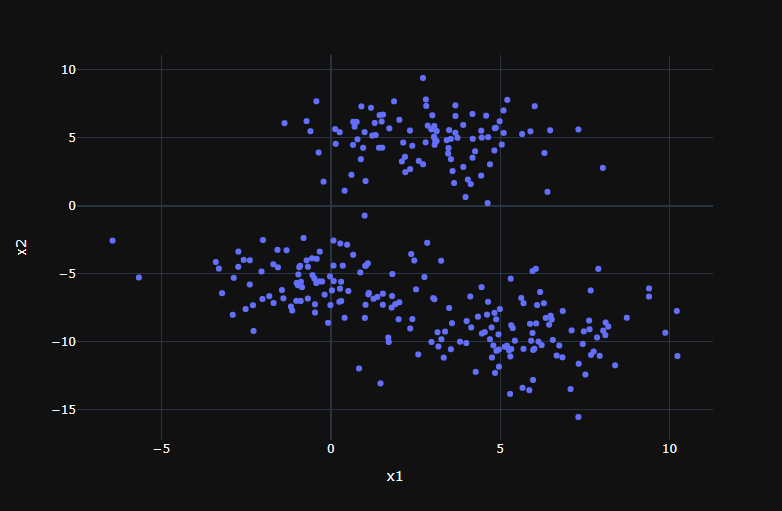

In [5]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, x='x1', y='x2', width=500, title='Outliers', nbinsx=20, nbinsy=20)
fig2 = px.scatter(tmp, x='x1', y='x2', width=500)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_layout(template='plotly_dark')
fig.show()

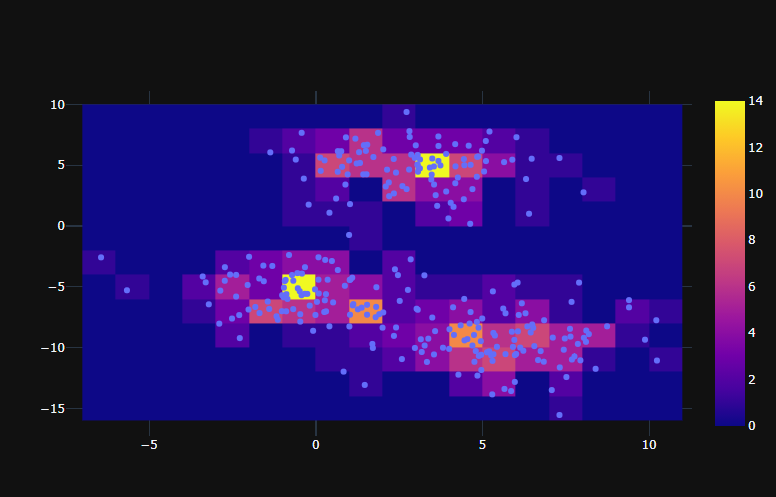

In [6]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5)
y_pred = lof.fit_predict(data)

all_data = np.c_[data, y_pred]
all_data[:5]

array([[  4.64616033,   5.03253239,   1.        ],
       [  1.81963552,  -5.03357756,   1.        ],
       [  0.89059085,   3.41070216,   1.        ],
       [  0.61174827,   2.26068253,   1.        ],
       [  6.01229431, -10.52657552,   1.        ]])

In [8]:
tmp['y_pred'] = y_pred
px.scatter(tmp, x='x1', y='x2', color='y_pred', template='plotly_dark')

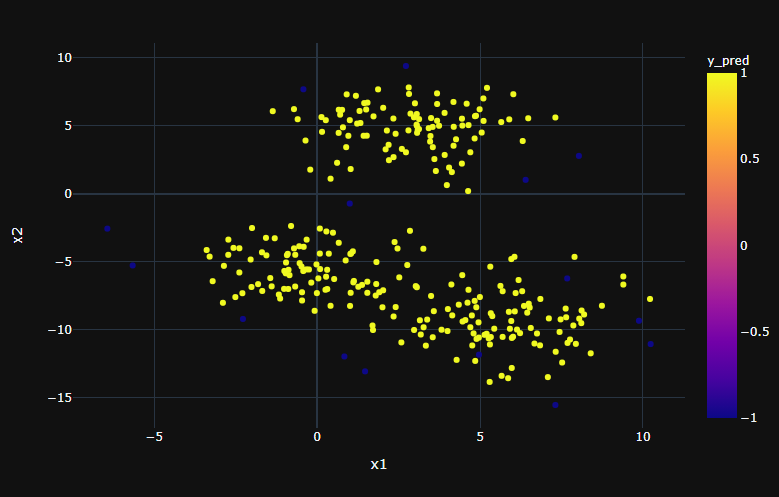

In [9]:
LOF_scores = lof.negative_outlier_factor_
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.04267228, 0.14287715, 0.1069532 , 0.15511672, 0.02904764])

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()

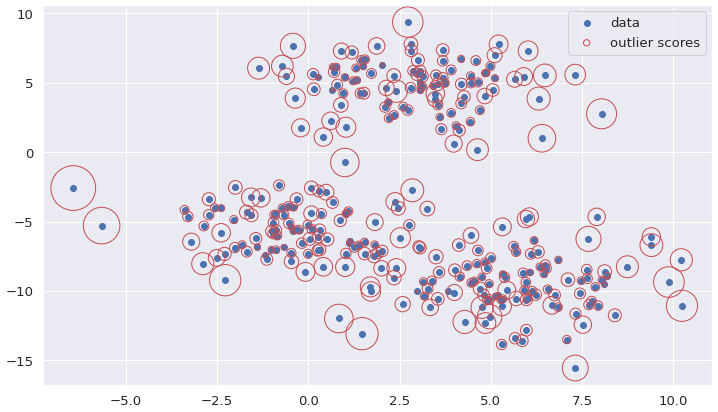

In [ ]:
def funkcja(n):
  lof = LocalOutlierFactor(n_neighbors=n)
  y_pred = lof.fit_predict(data)
  all_data = np.c_[data, y_pred]
  LOF_scores = lof.negative_outlier_factor_
  radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
  plt.figure(figsize=(12,7))
  plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
  plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
  legend = plt.legend()
  legend.legendHandles[1]._sizes = [40]
  plt.show()

In [ ]:
funkcja(1)

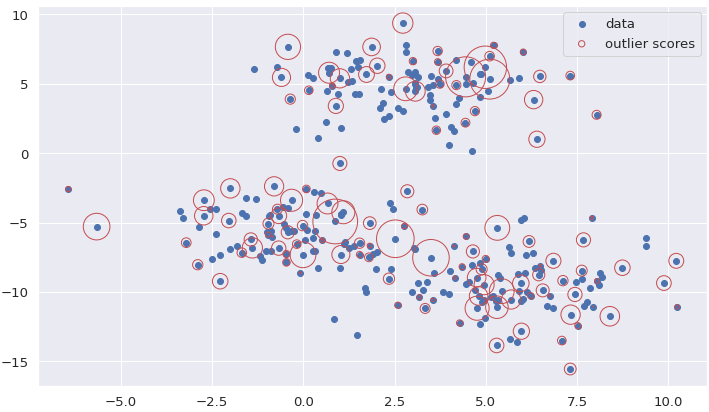

In [ ]:
funkcja(2)

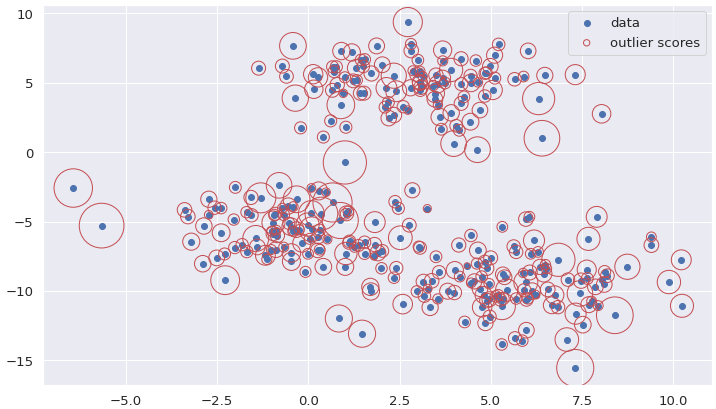

In [ ]:
funkcja(3)

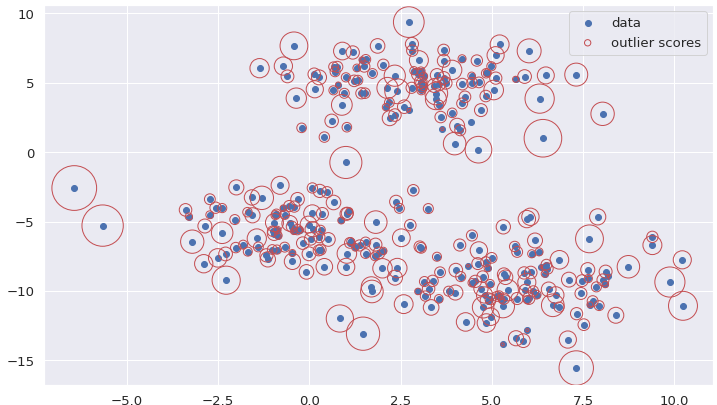

In [ ]:
funkcja(7)

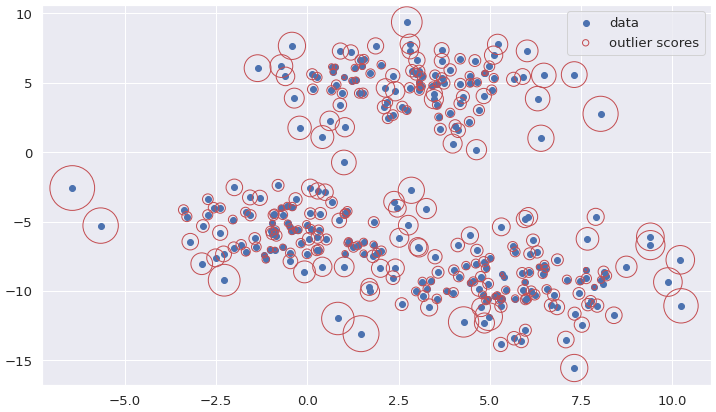

In [ ]:
funkcja(10)

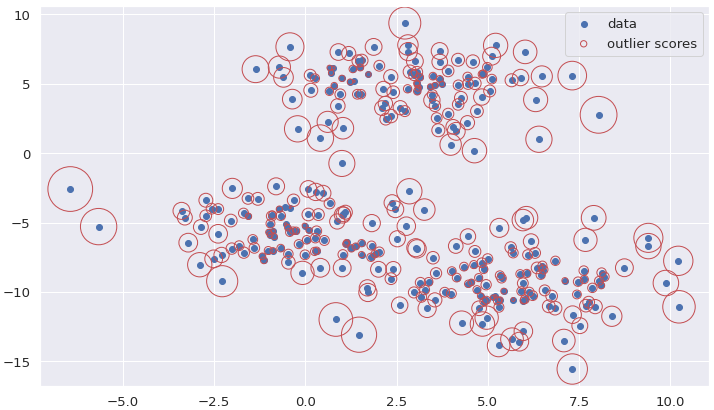

In [ ]:
funkcja(15)

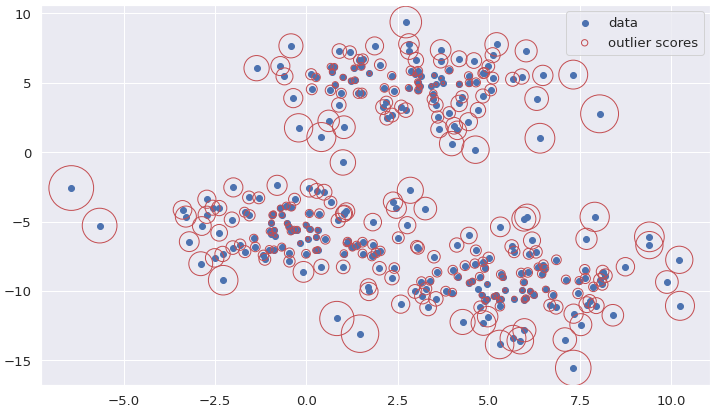

In [ ]:
funkcja(20)

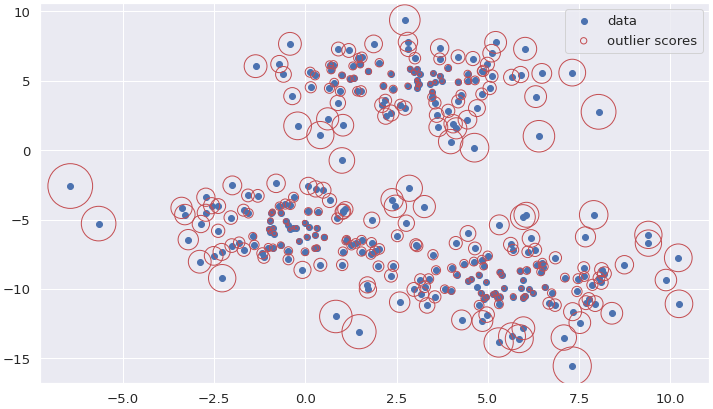

Wybrałem wartości k 10 i 15.

In [ ]:
data = make_blobs(n_samples=300, cluster_std=2.0, random_state=30)[0]

funkcja(10)

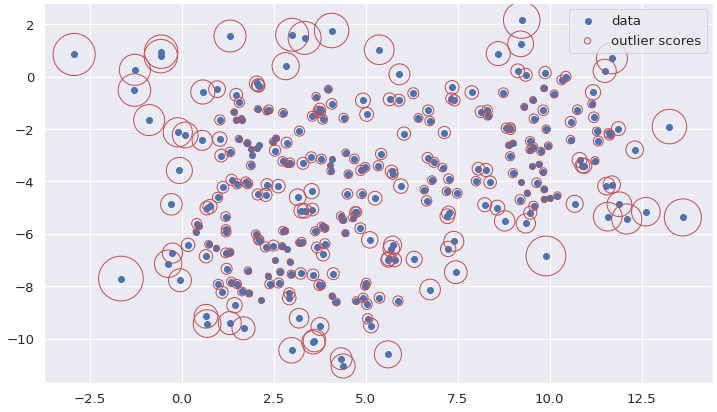

In [ ]:
funkcja(15)

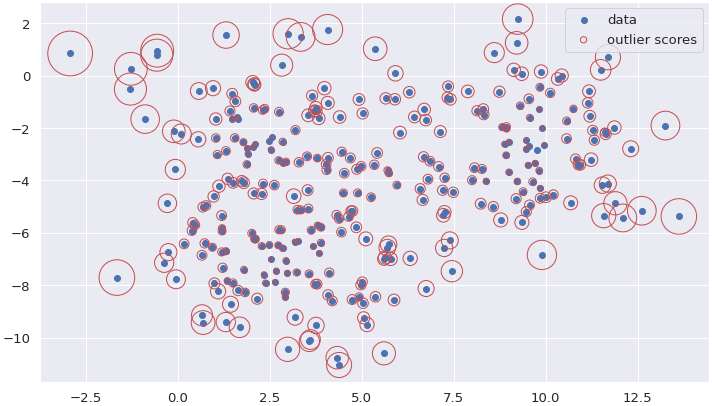

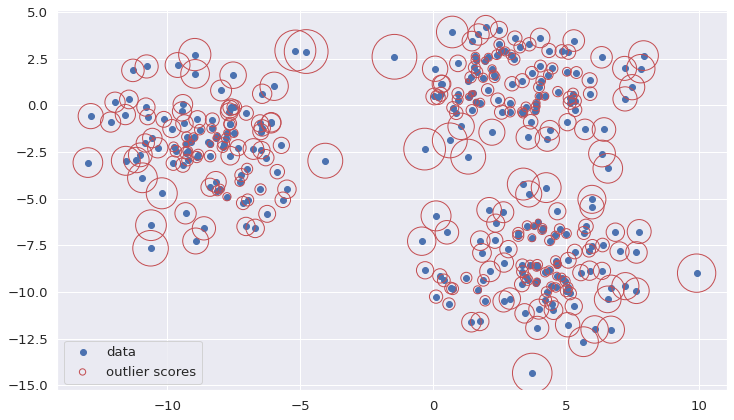

In [34]:
data = make_blobs(n_samples=300, cluster_std=2.0, random_state=500)[0]

funkcja(10)

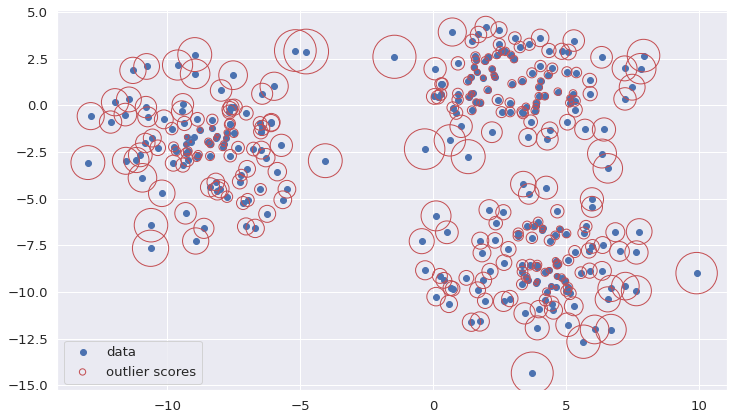

In [35]:
funkcja(15)